In [2]:

import numpy as np
import pandas as pd

 
import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
import string


import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel


import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models


import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

C:\Users\QUANTUM\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Task 1

In [3]:
reviews_df = pd.read_csv('K8 Reviews v0.2.csv')

Task 2

In [4]:
review_list = [review.lower() for review in reviews_df["review"]]
review_list

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it'

Task 3

In [5]:
rev_words = [word_tokenize(review) for review in review_list]

Task 4

In [6]:
pos_tagged_review = [pos_tag(review) for review in rev_words]

Task 5

In [7]:
nltk.help.upenn_tagset(tagpattern='NN*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [8]:
pos_noun_reviews = []
for review in pos_tagged_review:
    nouns=[]
    for word_tuple in review:
        if "NN" in word_tuple[1]:
            nouns.append(word_tuple)
    pos_noun_reviews.append(nouns)

In [9]:
pos_noun_reviews=[review for review in pos_noun_reviews if len(review)>=1]

Task 6

In [10]:
wnl = WordNetLemmatizer()
lemmatized_words =[]
for review in pos_noun_reviews:
    lemma_word=[]
    for word in review:
        lemma_word.append(wnl.lemmatize(word[0]))
    lemmatized_words.append(lemma_word)

Task 7

In [11]:
tweet_tokenize = TweetTokenizer()

stop_words = stopwords.words("english")
stop_words = stop_words+list(string.punctuation)+["\'s"]  

filtered_rev_words=[]

for review in lemmatized_words:
    filter_words=[]
    for words in review:
        rev_words = []
        rev_words = tweet_tokenize.tokenize(words)
        for word in rev_words:
            if word not in stop_words:
                filter_words.append(word)
    filtered_rev_words.append(filter_words)

In [12]:
filtered_rev_words=[review for review in filtered_rev_words if len(review)>=1]


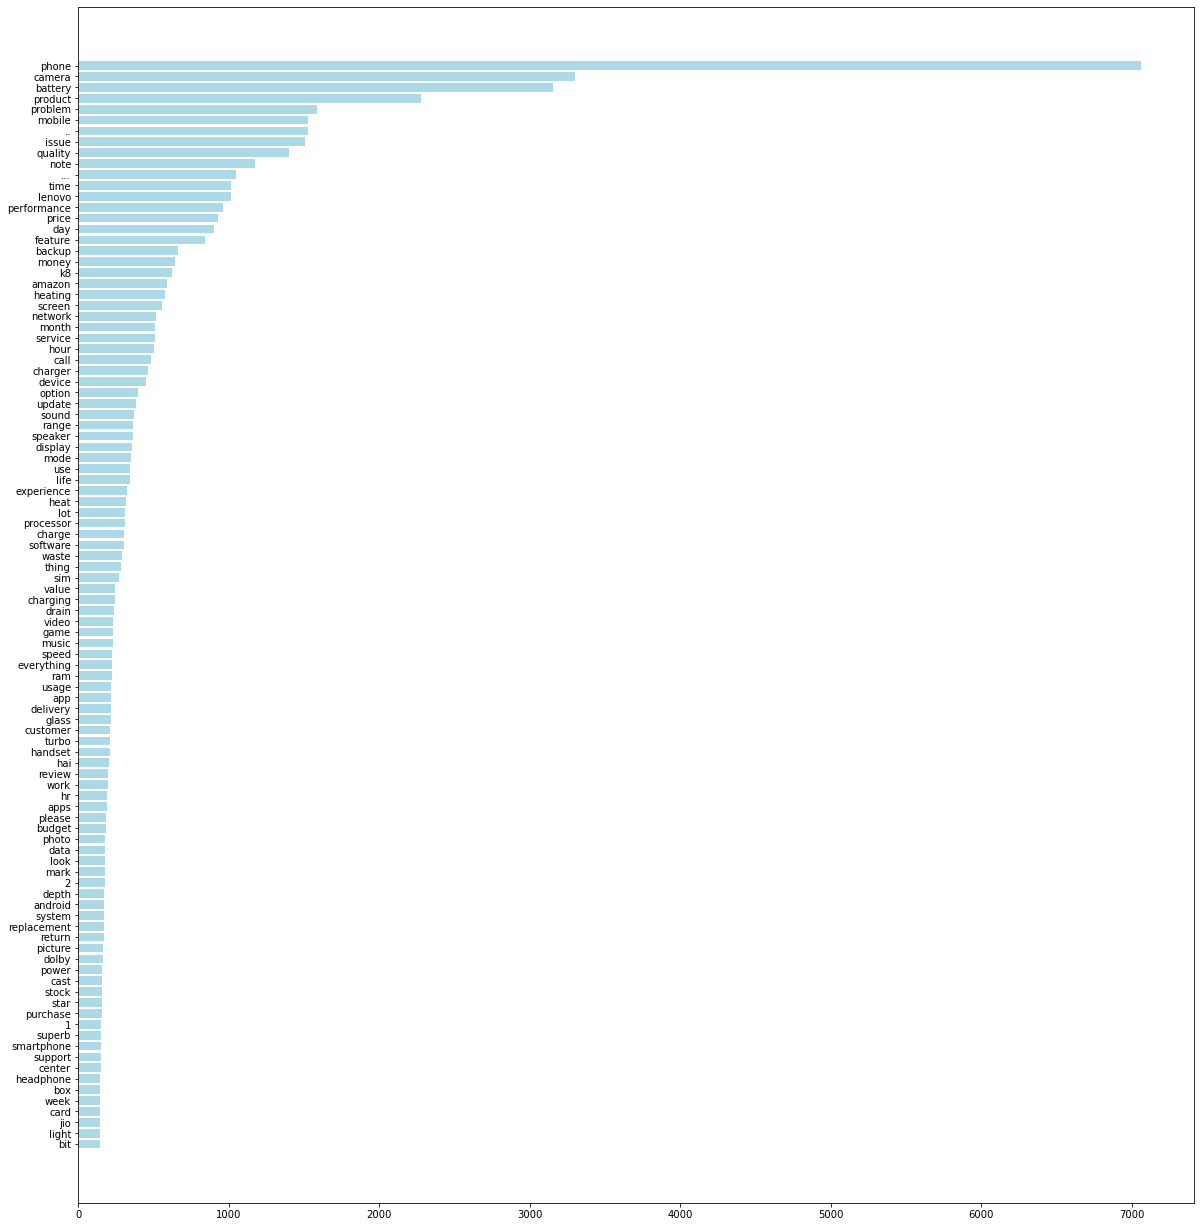

In [13]:

list_of_words = [word for review in filtered_rev_words for word in review]
common_word_freq=FreqDist(list_of_words).most_common(100)
word_list = common_word_freq[::-1]

words,freq = [],[]
for word in word_list:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y,color="lightblue")
plt.show()

In [14]:
stop_words_inclusions = ["...","..",'phone','good','bad','lenovo','k8','note','product',
                         'mobile','hai','please','pls','star','hi','ho','ok','superb','handset']
stop_words = stop_words + stop_words_inclusions


In [15]:
final_rev_words = []
for review in filtered_rev_words:
    stopwords_removed_review=[]
    for word in review:
        if word not in stop_words and word.isalnum() and (not word.isnumeric()) and len(word)!=1: 
            stopwords_removed_review.append(word)
    final_rev_words.append(stopwords_removed_review)

In [16]:
final_rev_words=[review for review in final_rev_words if len(review)>=1]

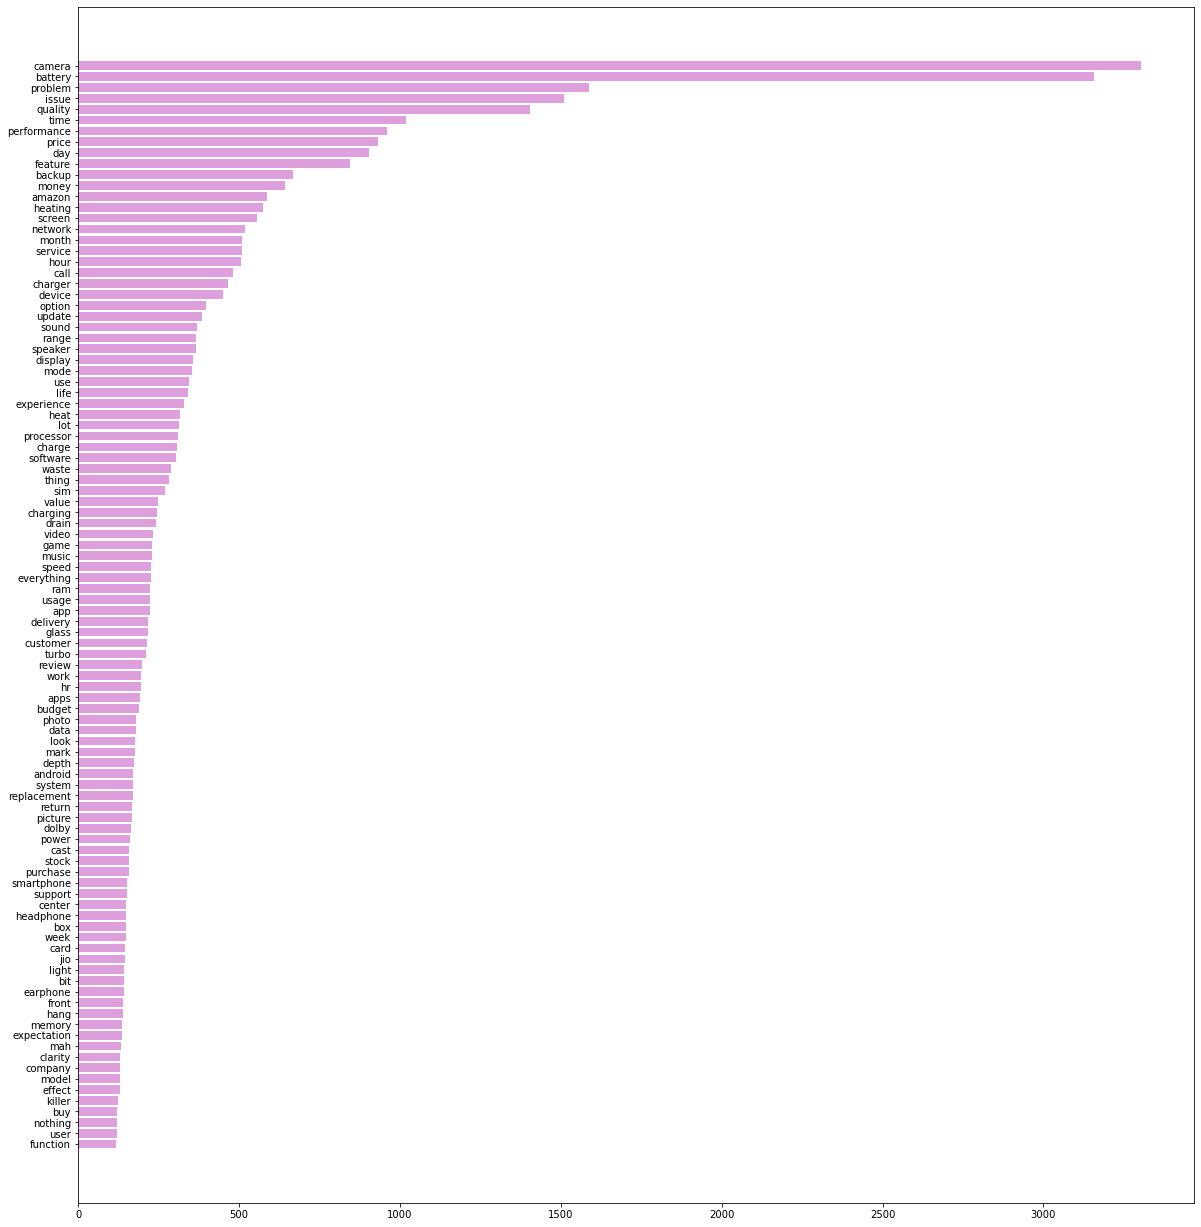

In [17]:
list_of_words = [word for review in final_rev_words for word in review]
word_freq=FreqDist(list_of_words).most_common(100)
word_list_2 = word_freq[::-1]

words,freq = [],[]
for word in word_list_2:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y,color="plum")
plt.show()

Task 8

In [18]:
id2word = corpora.Dictionary(final_rev_words)

corpus =[] 
for review in final_rev_words:
    new = id2word.doc2bow(review)
    corpus.append(new)
    
print(corpus[:20],"\n")
print("No of reviews:",len(corpus),"\n")
print("No of unique words:",len(id2word),"\n")

[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1)], [(2, 2), (13, 1), (14, 1)], [(15, 1), (16, 1)], [(17, 1), (18, 1)], [(4, 1), (19, 1)], [(14, 2), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1)], [(5, 1), (29, 1), (30, 1)], [(4, 1), (31, 1), (32, 1)], [(4, 1), (14, 2), (30, 1), (32, 1), (33, 1)], [(3, 1), (34, 1), (35, 1), (36, 1)], [(37, 1)], [(38, 1)], [(2, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1)], [(4, 2), (32, 1), (47, 1)], [(48, 1)], [(14, 1), (49, 1), (50, 1)]] 

No of reviews: 11858 

No of unique words: 6341 



In [19]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [20]:
lda_model.print_topics()

[(0,
  '0.157*"update" + 0.106*"waste" + 0.046*"smartphone" + 0.033*"bug" + 0.032*"hand" + 0.029*"function" + 0.029*"cost" + 0.028*"class" + 0.025*"connection" + 0.024*"mi"'),
 (1,
  '0.273*"camera" + 0.108*"quality" + 0.073*"day" + 0.030*"mode" + 0.028*"processor" + 0.027*"speaker" + 0.021*"use" + 0.021*"music" + 0.019*"usage" + 0.015*"thing"'),
 (2,
  '0.123*"amazon" + 0.080*"range" + 0.077*"software" + 0.042*"support" + 0.042*"mark" + 0.040*"game" + 0.039*"dolby" + 0.030*"refund" + 0.026*"power" + 0.026*"expectation"'),
 (3,
  '0.149*"screen" + 0.128*"device" + 0.089*"option" + 0.044*"sensor" + 0.041*"model" + 0.040*"user" + 0.034*"cast" + 0.028*"set" + 0.018*"someone" + 0.016*"interface"'),
 (4,
  '0.103*"charger" + 0.100*"heat" + 0.077*"charge" + 0.066*"lot" + 0.058*"bit" + 0.056*"turbo" + 0.048*"hr" + 0.046*"budget" + 0.042*"system" + 0.038*"slot"'),
 (5,
  '0.333*"issue" + 0.150*"money" + 0.069*"delivery" + 0.051*"value" + 0.038*"light" + 0.026*"application" + 0.025*"week" + 0.0

In [21]:
topics=[]
topic_terms=[]
for idx in range(12):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=10):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)
    
for idx in range(12):
    print(idx,topic_terms[idx])

0 ['update', 'waste', 'smartphone', 'bug', 'hand', 'function', 'cost', 'class', 'connection', 'mi']
1 ['camera', 'quality', 'day', 'mode', 'processor', 'speaker', 'use', 'music', 'usage', 'thing']
2 ['amazon', 'range', 'software', 'support', 'mark', 'game', 'dolby', 'refund', 'power', 'expectation']
3 ['screen', 'device', 'option', 'sensor', 'model', 'user', 'cast', 'set', 'someone', 'interface']
4 ['charger', 'heat', 'charge', 'lot', 'bit', 'turbo', 'hr', 'budget', 'system', 'slot']
5 ['issue', 'money', 'delivery', 'value', 'light', 'application', 'week', 'worth', 'brand', 'color']
6 ['feature', 'sim', 'speed', 'ram', 'apps', 'contact', 'gallery', 'mp', 'response', 'one']
7 ['service', 'replacement', 'glass', 'button', 'purchase', 'touch', 'piece', 'number', 'gorilla', 'wifi']
8 ['time', 'network', 'call', 'customer', 'app', 'charging', 'card', 'min', 'signal', 'volta']
9 ['battery', 'problem', 'heating', 'month', 'backup', 'hour', 'life', 'return', 'work', 'data']
10 ['price', 'displ

In [22]:
df_topics = pd.DataFrame(topic_terms).transpose()
df_topics.columns = topics

In [23]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=final_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4098900075104798


Task 9

In [24]:
pyLDAvis.enable_notebook()

In [25]:
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word)

C:\Users\QUANTUM\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [26]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.366977 -0.257603       1        1  20.382608
9      0.223605  0.381496       2        1  15.809596
8     -0.001192  0.004963       3        1  10.324637
11    -0.018624 -0.002059       4        1   9.529108
2     -0.055968 -0.012285       5        1   6.729742
5     -0.060878 -0.013890       6        1   6.231955
4     -0.063985 -0.014435       7        1   5.921831
3     -0.076142 -0.016800       8        1   5.482460
7     -0.076132 -0.016553       9        1   5.274394
10    -0.074630 -0.016730      10        1   5.239332
6     -0.076607 -0.017059      11        1   4.973290
0     -0.086424 -0.019046      12        1   4.101048, topic_info=            Term         Freq        Total Category  logprob  loglift
51        camera  3834.000000  3834.000000  Default  30.0000  30.0000
4        battery  3284.000000  3284.000000  Default  29.0000  29.0000
64         issue  1430.000000  1430.000000  Default  28.0000  28.0000
14       problem  1739.000000  1739.000000  Default  27.0000  27.0000
59         price   918.000000   918.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1321         job    25.987910    26.957932  Topic12  -4.6885   3.1573
497   difference    23.370987    24.341021  Topic12  -4.7947   3.1533
832        hence    23.128499    24.098544  Topic12  -4.8051   3.1528
2759         ota    17.199305    18.169669  Topic12  -5.1013   3.1390
521        start    16.877971    17.848006  Topic12  -5.1202   3.1380

[390 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
333       3  0.973153  accessory
1180     11  0.948549         ad
3075      6  0.960486       alot
2         5  0.998776     amazon
175       4  0.994337    android
...     ...       ...        ...
187       2  0.995020       work
900       7  0.953402    working
554       6  0.987801      worth
304       3  0.972468         ye
23        2  0.981353       year

[360 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 9, 12, 3, 6, 5, 4, 8, 11, 7, 1])

Task 10

In [27]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto") 

In [28]:
coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=final_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score: ', coherence_lda_2)


Coherence Score:  0.510218984012


In [29]:
vis2 =pyLDAvis.gensim_models.prepare(lda_model_2,corpus,id2word,mds='mmds',R=25)
vis2

C:\Users\QUANTUM\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.294966 -0.203667       1        1  41.835609
0     -0.161807  0.294352       2        1  24.595898
2      0.204324 -0.250375       3        1  18.809823
3      0.252449  0.159690       4        1  14.758671, topic_info=        Term         Freq        Total Category  logprob  loglift
51    camera  3381.000000  3381.000000  Default  25.0000  25.0000
4    battery  2927.000000  2927.000000  Default  24.0000  24.0000
14   problem  1476.000000  1476.000000  Default  23.0000  23.0000
64     issue  1270.000000  1270.000000  Default  22.0000  22.0000
89   feature   818.000000   818.000000  Default  21.0000  21.0000
..       ...          ...          ...      ...      ...      ...
466  gallery    85.708851    86.464710   Topic4  -4.7758   1.9046
335    super    77.982103    78.727558   Topic4  -4.8703   1.9038
836      pic    81.193045    81.977622   Topic4  -4.8299   1.9037
254     hand    77.626386    78.407033   Topic4  -4.8749   1.9033
63     color    68.718632    69.498852   Topic4  -4.9967   1.9020

[129 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         3  0.998880       amazon
578       3  0.998311          app
555       3  0.994509  application
3         1  0.998721       backup
4         1  0.999794      battery
...     ...       ...          ...
533       2  0.872799        video
174       3  0.988440        voice
306       4  0.996740        volta
164       2  0.996264        waste
187       4  0.996562         work

[107 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [30]:
lda_model_2.print_topics()

[(0,
  '0.087*"problem" + 0.075*"issue" + 0.053*"time" + 0.034*"money" + 0.033*"heating" + 0.025*"update" + 0.022*"heat" + 0.019*"software" + 0.017*"charge" + 0.017*"waste"'),
 (1,
  '0.117*"camera" + 0.102*"battery" + 0.046*"quality" + 0.031*"day" + 0.031*"price" + 0.029*"performance" + 0.020*"network" + 0.018*"backup" + 0.016*"device" + 0.014*"hour"'),
 (2,
  '0.063*"feature" + 0.039*"amazon" + 0.037*"month" + 0.036*"call" + 0.032*"service" + 0.029*"charger" + 0.024*"sound" + 0.022*"option" + 0.020*"delivery" + 0.016*"bit"'),
 (3,
  '0.045*"screen" + 0.028*"life" + 0.019*"turbo" + 0.019*"charging" + 0.016*"ram" + 0.016*"work" + 0.016*"budget" + 0.016*"glass" + 0.014*"card" + 0.013*"sensor"')]

In [31]:
topics_model2=[]
topic_terms_model2=[]
for idx in range(4):
    topics_model2.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model_2.get_topic_terms(idx,topn=10):
        terms.append(id2word[term[0]])
    topic_terms_model2.append(terms)
    
for idx in range(4):
    print(idx,topic_terms_model2[idx])

0 ['problem', 'issue', 'time', 'money', 'heating', 'update', 'heat', 'software', 'charge', 'waste']
1 ['camera', 'battery', 'quality', 'day', 'price', 'performance', 'network', 'backup', 'device', 'hour']
2 ['feature', 'amazon', 'month', 'call', 'service', 'charger', 'sound', 'option', 'delivery', 'bit']
3 ['screen', 'life', 'turbo', 'charging', 'ram', 'work', 'budget', 'glass', 'card', 'sensor']


In [32]:
df_topics_model_2 = pd.DataFrame(topic_terms_model2).transpose()
df_topics_model_2.columns=topics_model2

Task 11

In [33]:
topics_model2 = ["Problems and Issues"," Key features for user", "Sales and customer service", "Hardware specs and value features"]
df_topics_model_2.columns=topics_model2

In [34]:
df_topics_model_2.to_csv("Topic Model Reviews for K8.csv")

In [36]:
df_topics_model_2

,Problems and Issues,Key features for user,Sales and customer service,Hardware specs and value features
0,problem,camera,feature,screen
1,issue,battery,amazon,life
2,time,quality,month,turbo
3,money,day,call,charging
4,heating,price,service,ram
5,update,performance,charger,work
6,heat,network,sound,budget
7,software,backup,option,glass
8,charge,device,delivery,card
9,waste,hour,bit,sensor
